# Homework 1 EE399 - Brendan Oquist
Github: https://github.com/booquist

## Q2

### (i) Write a code to find the minimum error and determine the parameters A, B, C, D

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Given data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Model function
def f(x, A, B, C, D):
    return A * np.cos(B * x) + C * x + D

# Error function
def error(params, x, y):
    A, B, C, D = params
    return np.sum((f(x, A, B, C, D) - y) ** 2) / 4

# Initial guess for parameters A, B, C, and D
initial_guess = [1, 1, 0.7, 26]

# Minimizing the error function
result = minimize(error, initial_guess, args=(X, Y))

# Extracting the optimal parameters
A, B, C, D = result.x

print("Optimal parameters:")
print(f"A: {A:.4f}, B: {B:.4f}, C: {C:.4f}, D: {D:.4f}")

# Calculate the minimum error
min_error = error(result.x, X, Y)
print(f"Minimum error: {min_error:.4f}")


Optimal parameters:
A: 2.1717, B: 0.9093, C: 0.7325, D: 31.4528
Minimum error: 19.6600


### (i) - Plotting the data and best fit

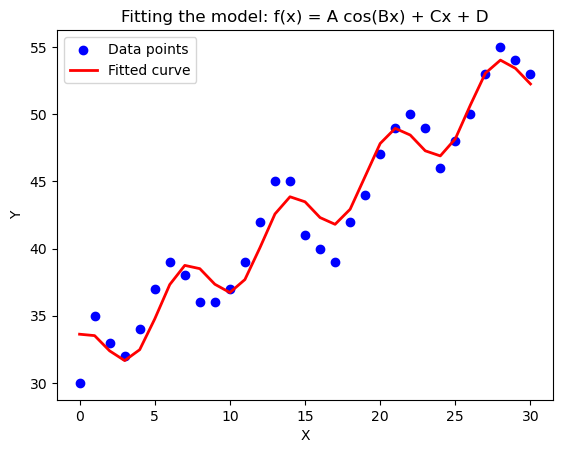

In [3]:
# Calculate the fitted values using the optimal parameters
fitted_Y = f(X, A, B, C, D)

# Plot the original data points
plt.scatter(X, Y, label='Data points', color='blue')

# Plot the fitted curve
plt.plot(X, fitted_Y, label='Fitted curve', color='red', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting the model: f(x) = A cos(Bx) + Cx + D')

# Display the plot
plt.show()


### (ii) With the results of (i), fix two of the parameters and sweep through values of the other two parameters to generate a 2D loss (error) landscape. Do all combinations of two fixed parameters and two swept parameters. You can use something like pcolor to visualize the results in a grid. How many minima can you find as you sweep through parameters?

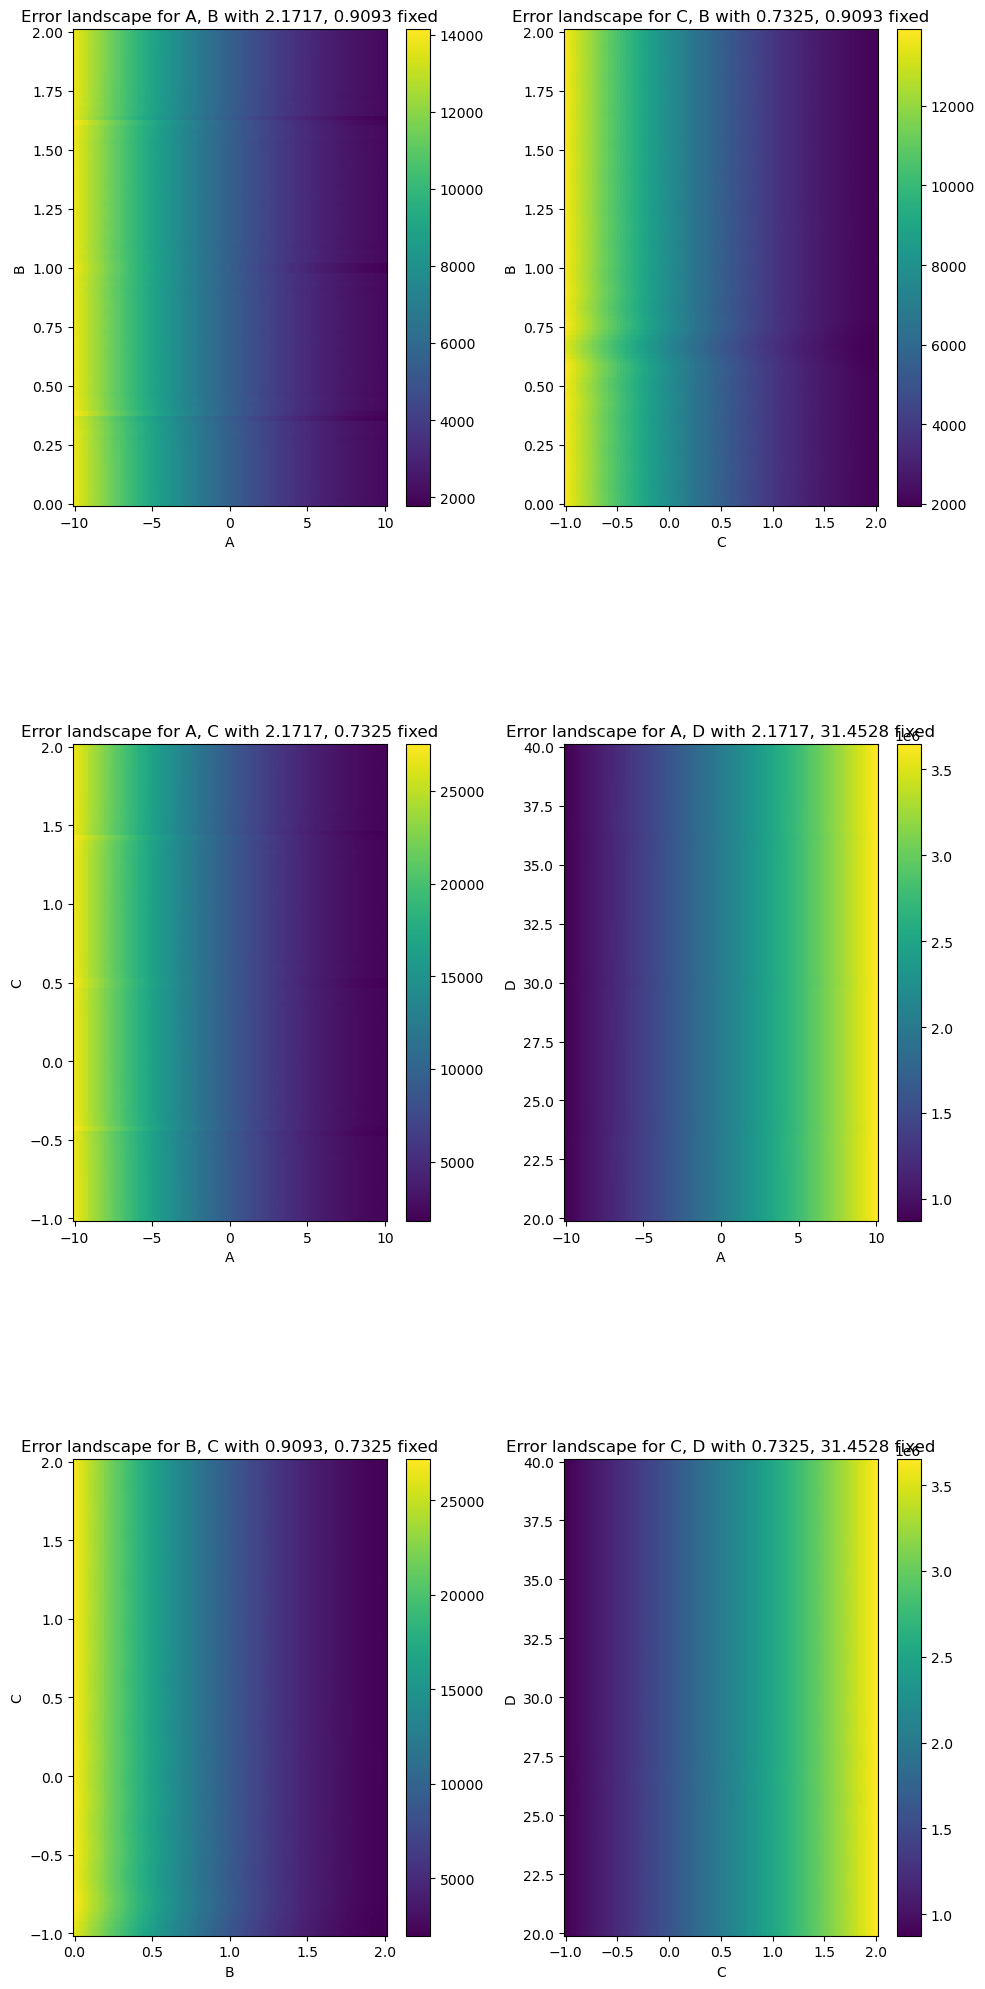

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def error_landscape(fixed_params, param_ranges, X, Y):
    grid_size = len(param_ranges[0])
    error_grid = np.zeros((grid_size, grid_size))

    for i, j in itertools.product(range(grid_size), range(grid_size)):
        params = [fixed_params[0], param_ranges[0][i], param_ranges[1][j], fixed_params[1]]
        error_grid[i, j] = error(params, X, Y)

    return error_grid

# Parameter sweep ranges
sweep_ranges = {
    'A': np.linspace(-10, 10, 100),
    'B': np.linspace(0, 2, 100),
    'C': np.linspace(-1, 2, 100),
    'D': np.linspace(20, 40, 100),
}

A, B, C, D = 2.1717, 0.9093, 0.7325, 31.4528  # Optimal parameters obtained from scipy minimize

# Fixed and swept parameter combinations
combinations = [
    ((A, B), ('A', 'B')),
    ((C, B), ('C', 'B')),
    ((A, C), ('A', 'C')),
    ((A, D), ('A', 'D')),
    ((B, C), ('B', 'C')),
    ((C, D), ('C', 'D')),
]

fig, axs = plt.subplots(3, 2, figsize=(10, 20))  # Change figsize to (10, 20) for more space between plots

for idx, (fixed_params, swept_params) in enumerate(combinations):
    error_grid = error_landscape(fixed_params, (sweep_ranges[swept_params[0]], sweep_ranges[swept_params[1]]), X, Y)
    ax = axs[idx // 2, idx % 2]
    c = ax.pcolor(sweep_ranges[swept_params[0]], sweep_ranges[swept_params[1]], error_grid, shading='auto')
    ax.set_xlabel(f'{swept_params[0]}')
    ax.set_ylabel(f'{swept_params[1]}')
    ax.set_title(f'Error landscape for {swept_params[0]}, {swept_params[1]} with {fixed_params[0]}, {fixed_params[1]} fixed')
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Add more space between rows of plots
plt.show()


### (iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree polynomial to the data. Compute the least-square error for each of these over the training points. Then compute the least square error of these models on the test data which are the remaining 10 data points.

In [52]:
from numpy.polynomial import Polynomial

# Split data into training and test sets
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

# Fit models
linear_fit = Polynomial.fit(X_train, Y_train, 1)
parabola_fit = Polynomial.fit(X_train, Y_train, 2)
poly19_fit = Polynomial.fit(X_train, Y_train, 19)

# Calculate predictions
linear_Y_train = linear_fit(X_train)
parabola_Y_train = parabola_fit(X_train)
poly19_Y_train = poly19_fit(X_train)

linear_Y_test = linear_fit(X_test)
parabola_Y_test = parabola_fit(X_test)
poly19_Y_test = poly19_fit(X_test)

# Calculate least-squares errors
def least_squares_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

models = ["linear", "parabola", "19th-degree polynomial"]
train_errors = [
    least_squares_error(Y_train, linear_Y_train),
    least_squares_error(Y_train, parabola_Y_train),
    least_squares_error(Y_train, poly19_Y_train),
]
test_errors = [
    least_squares_error(Y_test, linear_Y_test),
    least_squares_error(Y_test, parabola_Y_test),
    least_squares_error(Y_test, poly19_Y_test),
]

# Print the errors
print("Least-squares errors on training data:")
for model, error in zip(models, train_errors):
    print(f"{model}: {error:.4f}")

print("\nLeast-squares errors on test data:")
for model, error in zip(models, test_errors):
    print(f"{model}: {error:.4f}")


Least-squares errors on training data:
linear: 5.0299
parabola: 4.5179
19th-degree polynomial: 0.0000

Least-squares errors on test data:
linear: 11.3141
parabola: 75.9277
19th-degree polynomial: 38454308324079644442624.0000


As demonstrated by the incredibly large degree of error for the 19th degree polynomial, we see a large amount of polynomial wiggle, where the 19th degree polynomial overfits the training data. This leads to 0 error on the training data, but massive amounts of error outside of it. 

### (iii) - Plotting the data and best fit

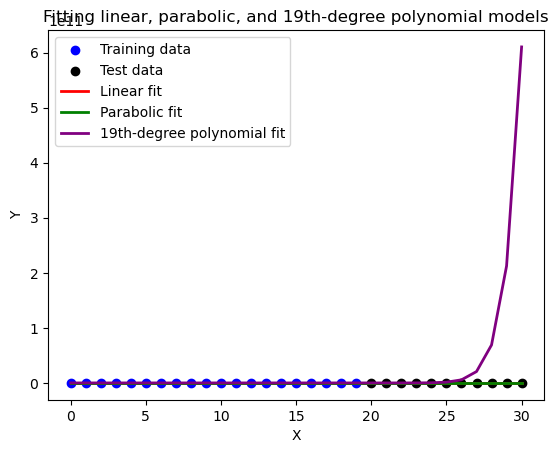

In [53]:
# Calculate the fitted values for the entire dataset
linear_Y = linear_fit(X)
parabola_Y = parabola_fit(X)
poly19_Y = poly19_fit(X)

# Plot the original data points
plt.scatter(X[:20], Y_train, label='Training data', color='blue')
plt.scatter(X[20:], Y_test, label='Test data', color='black')
#plt.ylim(bottom=-1, top=6)  # set the y-limits

# Plot the fitted models
plt.plot(X, linear_Y, label='Linear fit', color='red', linewidth=2)
plt.plot(X, parabola_Y, label='Parabolic fit', color='green', linewidth=2)
plt.plot(X, poly19_Y, label='19th-degree polynomial fit', color='purple', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting linear, parabolic, and 19th-degree polynomial models')

# Display the plot
plt.show()


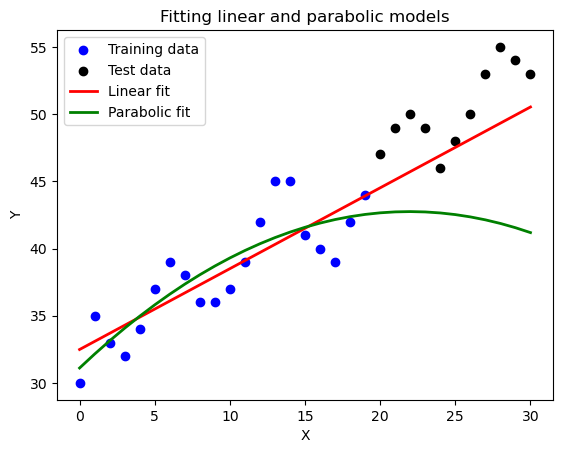

In [54]:
# Calculate the fitted values for the entire dataset
linear_Y = linear_fit(X)
parabola_Y = parabola_fit(X)

# Plot the original data points
plt.scatter(X_train, Y_train, label='Training data', color='blue')
plt.scatter(X_test, Y_test, label='Test data', color='black')

# Plot the fitted models
plt.plot(X, linear_Y, label='Linear fit', color='red', linewidth=2)
plt.plot(X, parabola_Y, label='Parabolic fit', color='green', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting linear and parabolic models')

# Display the plot
plt.show()


### (iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)

Least-squares errors on training data:
linear: 3.4287
parabola: 3.4256
19th-degree polynomial: 0.0000

Least-squares errors on test data:
linear: 8.6454
parabola: 8.4437
19th-degree polynomial: 180926.4988


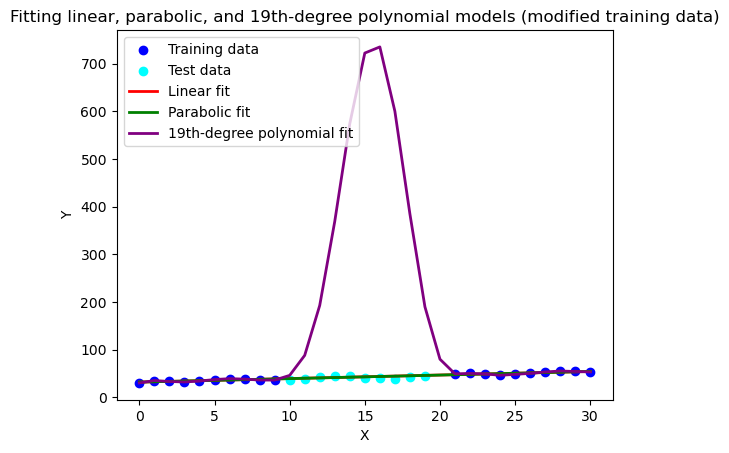

In [55]:
# Split data into training and test sets
X_train, Y_train = np.concatenate((X[:10], X[-10:])), np.concatenate((Y[:10], Y[-10:]))
X_test, Y_test = X[10:20], Y[10:20]

# Fit models
linear_fit = Polynomial.fit(X_train, Y_train, 1)
parabola_fit = Polynomial.fit(X_train, Y_train, 2)
poly19_fit = Polynomial.fit(X_train, Y_train, 19)

# Calculate predictions
linear_Y_train = linear_fit(X_train)
parabola_Y_train = parabola_fit(X_train)
poly19_Y_train = poly19_fit(X_train)

linear_Y_test = linear_fit(X_test)
parabola_Y_test = parabola_fit(X_test)
poly19_Y_test = poly19_fit(X_test)

# Calculate least-squares errors
def least_squares_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

models = ["linear", "parabola", "19th-degree polynomial"]
train_errors = [
    least_squares_error(Y_train, linear_Y_train),
    least_squares_error(Y_train, parabola_Y_train),
    least_squares_error(Y_train, poly19_Y_train),
]
test_errors = [
    least_squares_error(Y_test, linear_Y_test),
    least_squares_error(Y_test, parabola_Y_test),
    least_squares_error(Y_test, poly19_Y_test),
]

# Print the errors
print("Least-squares errors on training data:")
for model, error in zip(models, train_errors):
    print(f"{model}: {error:.4f}")

print("\nLeast-squares errors on test data:")
for model, error in zip(models, test_errors):
    print(f"{model}: {error:.4f}")

# Plot the original data points and fitted models
plt.scatter(X_train, Y_train, label='Training data', color='blue')
plt.scatter(X_test, Y_test, label='Test data', color='cyan')

plt.plot(X, linear_fit(X), label='Linear fit', color='red', linewidth=2)
plt.plot(X, parabola_fit(X), label='Parabolic fit', color='green', linewidth=2)
plt.plot(X, poly19_fit(X), label='19th-degree polynomial fit', color='purple', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting linear, parabolic, and 19th-degree polynomial models (modified training data)')

plt.show()

As we can see, the error on the outskirts of the data is 0, but the data in the middle is massive, once again signifying extreme overfitting